## Question 1:

Attach the dataset and mentioned problem statement below,

● A sizable department has to be maintained, for the purposes of recruiting new talent
● More often than not, the new employees have to be trained for the job and/or given time to
acclimatize themselves to the company
● Hence, the management has contracted an HR analytics firm to understand what factors they
should focus on, in order to curb attrition.
● In other words, they want to know what changes they should make to their workplace, in order to
get most of their employees to stay.
● Also, they want to know which of these variables is most important and needs to be addressed

# Assignment 11

In [28]:
#Load Data Set using Pandas
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats
import numpy as np

df=pd.read_csv('general_data2.csv') 
df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [15]:
#co , p =scipy.stats.pearsonr(df['Attrition'],df['MonthlyIncome'])

##mean=df["Age"].mean()
# print(mean)
# df["Age"].replace(np.nan, mean, inplace = True)co,p
# #mean=df["Age"].mean()
# print(mean)
# df["Age"].replace(np.nan, mean, inplace = True)
# df.rename(columns = {'Age1': 'Age'}, inplace=True)
# df['Age']= df['Age'].std()
# df['Age'].head()
# a=[{'alpha': [1,10,100]}]
# a
# co , p =scipy.stats.pearsonr(df['Attrition'],df['MonthlyIncome'])
# co,p


# df.head()

(-0.031176281698115007, 0.03842748490600132)

In [49]:
df.columns
from sklearn import preprocessing
Label_encoder = preprocessing.LabelBinarizer()

df["Attrition"]=Label_encoder.fit_transform(df["Attrition"])
from scipy.stats import pearsonr
stats,p=pearsonr(df.Attrition, df.MonthlyIncome)
print(stats,p)

-0.031176281698115007 0.03842748490600132


In [48]:
#Assignment 7

from scipy.stats import pearsonr

#Filling nan or missing values
#df["TotalWorkingYears"].mean() #4410 #4391 2.6948303347756775
#df['TotalWorkingYears']=df['TotalWorkingYears'].fillna(11.279936378095888)

dr = df

dr = pd.get_dummies(df["Attrition"], drop_first=True)
dr.rename(columns={"Yes": "Attrition"}, inplace =True)
ned = df.columns.drop(["EmployeeCount","StandardHours"])
column_1 = dr["Attrition"]

for n in ned:    
    if df[n].dtypes == "int64" or df[n].dtypes=="float64":
        column_2 = df[n]
        #correlation = column_1.corr(column_2)
        stats, p=pearsonr(column_1, column_2)
        #print(f"{n}===", stats, p)
        print('{:<23}{:>10f}{:>15f}'.format(n,stats,p))
       


Age                     -0.159205       0.000000
DistanceFromHome        -0.009730       0.518286
Education               -0.015111       0.315729
EmployeeID              -0.004729       0.753549
JobLevel                -0.010290       0.494517
MonthlyIncome           -0.031176       0.038427
NumCompaniesWorked       0.042232       0.005032
PercentSalaryHike        0.032533       0.030743
StockOptionLevel        -0.006839       0.649807
TotalWorkingYears       -0.170111       0.000000
TrainingTimesLastYear   -0.049431       0.001025
YearsAtCompany          -0.134392       0.000000
YearsSinceLastPromotion -0.033019       0.028330
YearsWithCurrManager    -0.156199       0.000000


# The inference of the above analysis are as follows:

Attrition & DistanceFromHome:
As r = -0.009, there’s low negative correlation between Attrition and DistanceFromHome
As the P value of 0.518 is > 0.05, we are accepting H0 and hence there’s no significant correlation
between Attrition & DistanceFromHome
Attrition & MonthlyIncome:
As r = -0.031, there’s low negative correlation between Attrition and MonthlyIncome
As the P value of 0.038 is < 0.05, we are accepting Ha and hence there’s significant correlation
between Attrition & MonthlyIncome
Attrition & TotalWorkingYears:
As r = -0.17, there’s low negative correlation between Attrition and TotalWorkingYears
As the P value is < 0.05, we are accepting Ha and hence there’s significant correlation between
Attrition & TotalWorkingYears
Attrition & YearsAtCompany:
As r = -0.1343, there’s low negative correlation between Attrition and YearsAtCompany
As the P value is < 0.05, we are accepting Ha and hence there’s significant correlation between
Attrition & YearsAtCompany
Attrition & YearsWithCurrManager:
As r = -0.1561, there’s low negative correlation between Attrition and YearsWithCurrManager
As the P value is < 0.05, we are accepting Ha and hence there’s significant correlation between
Attrition & YearsWithCurrManager

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.006963,-0.035706,NaN,0.008649,-0.002884,-0.044314,0.298528,-0.033137,NaN,-0.031753,0.680419,-0.027308,0.311309,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.009730,-0.015111,NaN,-0.004729,-0.010290,-0.031176,0.042232,0.032533,NaN,-0.006839,-0.170111,-0.049431,-0.134392,-0.033019,-0.156199
DistanceFromHome,0.006963,-0.009730,1.000000,-0.008638,NaN,-0.001097,-0.037329,-0.021607,-0.013818,0.038125,NaN,0.011169,0.009361,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.015111,-0.008638,1.000000,NaN,-0.009680,0.045746,0.006410,-0.016219,-0.040531,NaN,0.001261,-0.010712,0.010472,0.006080,0.022490,0.005358
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.004729,-0.001097,-0.009680,NaN,1.000000,-0.003303,0.007338,-0.001114,-0.004456,NaN,-0.014254,-0.001061,-0.010191,0.004086,0.000256,0.008579
JobLevel,-0.002884,-0.010290,-0.037329,0.045746,NaN,-0.003303,1.000000,0.047316,-0.009844,0.010973,NaN,0.000993,-0.036934,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.031176,-0.021607,0.006410,NaN,0.007338,0.047316,1.000000,-0.020710,0.004325,NaN,0.026930,-0.033758,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.298528,0.042232,-0.013818,-0.016219,NaN,-0.001114,-0.009844,-0.020710,1.000000,0.030825,NaN,0.017130,0.238052,-0.032239,-0.117820,-0.036618,-0.109480
PercentSalaryHike,-0.033137,0.032533,0.038125,-0.040531,NaN,-0.004456,0.010973,0.004325,0.030825,1.000000,NaN,0.012548,-0.018717,-0.037392,-0.029707,-0.029542,-0.040864


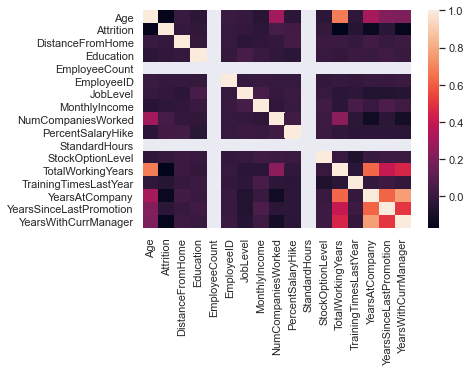

In [53]:
import seaborn as sns; sns.set()
#df.corr()
ax = sns.heatmap(df.corr())
df.corr()
